## Respuesta dinámica a excitaciones generales con amortiguación
### Cálculo directo de la integral de Duhamel

#### Problema 4.
Determine la respuesta dinámica a una torre sometida a la fuerza producida por una explosión en su vecindad. La idealización de la estructura y de la carga debido a la explosión se muestran en la figura. Considere la amortiguación en el sistema igual a $20\%$ de la amortiguación crítica .

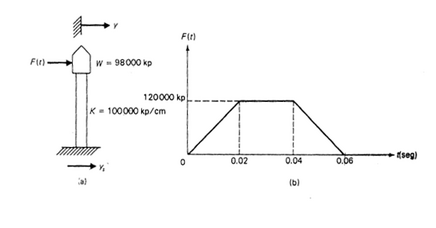

In [1]:
from IPython.display import Image
Image(filename="imagenes/fig_1.png")

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from librerias.integral import cuad_gauss # librería que aproxima las integrales mediante el método de Cuadratura de Gauss

In [3]:
# Iniciamos las variables
P = 98000 # Peso W en kp
g = 980 # Gravedad en cm/s2
m = P/g  # masa en kp*s2/cm
k = 100000  # rigidez en kp/cm
e = 0.2 # razón de amortiguación del sistema

F = np.array([0,120000,120000,0,0,0])	# Fuerza(puntos donde cambia de valor)
t = np.array([0,0.02,0.04,0.06,0.08,0.1])	# tiempo(intervalos)

Cálculos:

In [4]:
w = (k/m)**0.5  # Frecuencia angular natural(rad/s)
wd = w*(1 - e**2)**0.5 # Frecuencia del sistema con amortiguación

Utilizaremos las siguientes ecuaciones:
$$ I_1=\int^{t_i}_{t_{i-1}} e^{\xi \omega \tau}cos(\omega_{D}\tau d\tau)$$
$$ I_2=\int^{t_i}_{t_{i-1}} e^{\xi \omega \tau}sen(\omega_{D}\tau d\tau)$$
$$ I_3=\int^{t_i}_{t_{i-1}} \tau e^{\xi \omega \tau}sen(\omega_{D}\tau d\tau)$$
$$ I_4=\int^{t_i}_{t_{i-1}} \tau e^{\xi \omega \tau}cos(\omega_{D}\tau d\tau)$$

$$ A_D(t_i) = A_D(t_{i-1}) + \left(F(t_{i-1})-t_{i-1}\frac{\Delta F_i}{\Delta t_i} \right) I_1+\frac{\Delta F_i}{\Delta t_i}I_4$$

$$ B_D(t_i) = A_D(t_{i-1}) + \left(F(t_{i-1})-t_{i-1}\frac{\Delta F_i}{\Delta t_i} \right) I_2+\frac{\Delta F_i}{\Delta t_i}I_3$$

$$ y(t_i) = \frac{e^{\xi \omega t_i}}{m \omega_D}(A_D(t_i)sen(\omega_D t_i)-B_D(t_i)cos(\omega_D t_i) )$$

In [5]:
n = F.shape[0] # número de elementos de F

# Variables iniciales necesarias
y0 = 0 # desplazamiento inicial
v0 = 0 # velocidad inicial
a0 = 0 # acelereación inicial
A = 0
B = 0
AA = [A]
BB = [B]
y = [y0]
v = [v0]
a = [a0]

In [6]:
# definimos las ecuaciones dentro de las integrales

i1 = lambda t: np.exp(e * w * t) * np.cos(wd * t)
i2 = lambda t: np.exp(e * w * t) * np.sin(wd * t)
i3 = lambda t: t * np.exp(e * w * t) * np.sin(wd * t)
i4 = lambda t: t * np.exp(e * w * t) * np.cos(wd * t)

In [7]:
# definimos las función y(t) = f y derivadas
f = lambda t: (A*np.sin(wd * t) - B * np.cos(wd * t)) * np.exp(-e * w * t) / (m * wd)
h = 0.000001
df = lambda t: (f(t + h) - f(t))/h # primera derivada
ddf = lambda t: (df(t + h) - df(t))/h # segunda derivada

In [15]:
# iteramos
for i in range(n - 1):
    I1 = cuad_gauss(t[i], t[i+1], i1)
    I2 = cuad_gauss(t[i], t[i+1], i2)
    I3 = cuad_gauss(t[i], t[i+1], i3)
    I4 = cuad_gauss(t[i], t[i+1], i4)

    A = A + (F[i] - t[i]*(F[i+1] - F[i])/(t[i+1] - t[i])) * I1 + ((F[i+1] - F[i]) / (t[i+1] - t[i])) * I4
    B = B + (F[i] - t[i]*(F[i+1] - F[i])/(t[i+1] - t[i])) * I2 + ((F[i+1] - F[i]) / (t[i+1] - t[i])) * I3
    AA.append(A)
    BB.append(B)
    y.append(f(t[i + 1]))
    v.append(df(t[i + 1]))
    a.append(ddf(t[i + 1]))

In [16]:
df = pd.DataFrame({'t(s)':t,'F':F,'A':AA,'B':BB,'y':y,'v':v,'a':a})
df

,t(s),F,A,B,y,v,a
0,0.00,0,0.0,0.0,0.000000,0.000000,0.000000
1,0.02,120000,1200.0,540.0,0.073185,10.908651,-211.179435
2,0.04,120000,2894.4,2840.4,0.454249,25.294850,-774.226849
3,0.06,0,3102.0,4407.6,0.933442,16.976155,-1148.185436
4,0.08,0,3102.0,4407.6,1.047515,-5.013698,-984.084370
5,0.10,0,3102.0,4407.6,0.778048,-20.374728,-520.301580


El efecto de la explosión termina en el instante $t = 0.06$, los valores A y B permanecen constantes después de ese tiempo. En consecuencia, la vibración que sigue se obtiene sustituyendo los valores  de A y B calculados para $t =0.06$: 

In [19]:
print("y(t) = e^({}t)*({} sen{}t - {} cos{}t)".format(round(-e*w,2),round(A/(m*wd),4),round(wd,2),round(B/(m*wd),4),round(wd,2)))

y(t) = e^(-6.32t)*(1.0012 sen30.98t - 1.4225 cos30.98t)
